(165, 8)
Index(['Structure_id', ' num_vox', ' conf_matrix_00', ' conf_matrix_01',
       ' conf_matrix_10', ' conf_matrix_11', ' accuracy', ' auc'],
      dtype='object')
Structure_id        3ol6
 num_vox           28823
 conf_matrix_00    20450
 conf_matrix_01     5851
 conf_matrix_10      267
 conf_matrix_11     2255
 accuracy          78.77
 auc                0.88
Name: 0, dtype: object
(165, 8)
Structure_id        3ol6
 num_vox           28823
 conf_matrix_00    25917
 conf_matrix_01      384
 conf_matrix_10     1490
 conf_matrix_11     1032
 accuracy           93.5
 auc                0.92
Name: 0, dtype: object
Napovedi 0/1:
MIN accuracy: 37.3, MAX accuracy: 85.7, MEAN accuracy: 73.14393939393939
MIN AUC: 0.41, MAX AUC: 0.91, MEAN AUC: 0.7635151515151516
Napovedi po nadstropjih:
MIN accuracy: 21.43, MAX accuracy: 99.27, MEAN accuracy: 89.71145454545456
MIN AUC: 0.49, MAX AUC: 0.91, MEAN AUC: 0.7906060606060605


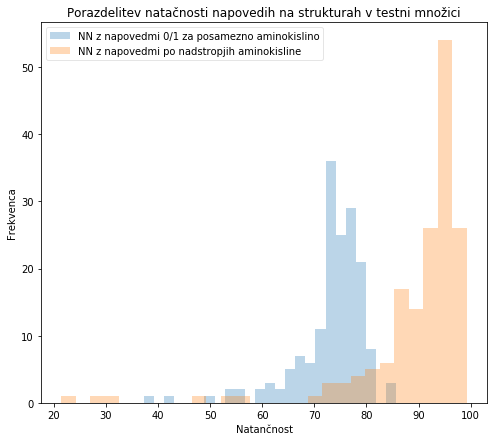

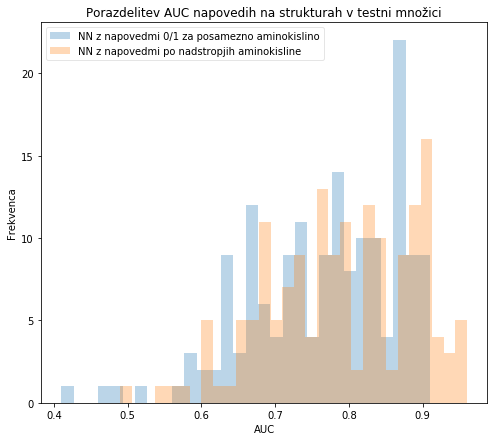

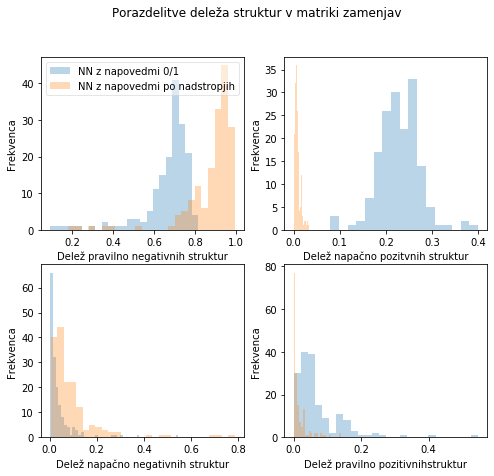

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

results_1 = pd.read_csv('./results/combined_predictions_1.csv')
print(results_1.shape)
print(results_1.columns)
print(results_1.loc[0])

results_17 = pd.read_csv('./results/combined_predictions_17.csv')
print(results_17.shape)
print(results_17.loc[0])

# results_17_w = pd.read_csv('./results/combined_predictions_17_weighted_2.csv')
# print(results_17_w.shape)
# print(results_17_w.loc[0])

accs = results_1[' accuracy'].values
aucs = results_1[' auc'].values
print('Napovedi 0/1:')
print(f'MIN accuracy: {min(accs)}, MAX accuracy: {max(accs)}, MEAN accuracy: {np.mean(accs)}')
print(f'MIN AUC: {min(aucs)}, MAX AUC: {max(aucs)}, MEAN AUC: {np.mean(aucs)}')

accs_17 = results_17[' accuracy'].values
aucs_17 = results_17[' auc'].values
print('Napovedi po nadstropjih:')
print(f'MIN accuracy: {min(accs_17)}, MAX accuracy: {max(accs_17)}, MEAN accuracy: {np.mean(accs_17)}')
print(f'MIN AUC: {min(aucs_17)}, MAX AUC: {max(aucs)}, MEAN AUC: {np.mean(aucs_17)}')

# accs_17_w = results_17_w[' accuracy'].values
# aucs_17_w = results_17_w[' auc'].values
# print(min(accs_17_w), max(accs_17_w), np.mean(accs_17_w))
# print(min(aucs_17_w), max(aucs_17_w), np.mean(aucs_17_w))

args = dict(histtype='stepfilled', alpha=0.3, bins='auto')

plt.hist(accs, label = 'NN z napovedmi 0/1 za posamezno aminokislino', **args)
plt.hist(accs_17, label = 'NN z napovedmi po nadstropjih aminokisline', **args)
# plt.hist(accs_17_w, **args)
plt.title('Porazdelitev natačnosti napovedih na strukturah v testni množici')
plt.xlabel('Natančnost')
plt.ylabel('Frekvenca')
plt.legend(loc="upper left", fancybox=True, framealpha=0.5)
plt.savefig('natancnosti_testna')
plt.show()

args_auc  = dict(histtype='stepfilled', alpha=0.3, bins=30)
plt.hist(aucs, label = 'NN z napovedmi 0/1 za posamezno aminokislino', **args_auc)
plt.hist(aucs_17, label = 'NN z napovedmi po nadstropjih aminokisline', **args_auc)
# plt.hist(aucs_17_w, label = 'NN17w', **args_auc)
plt.title('Porazdelitev AUC napovedih na strukturah v testni množici')
plt.xlabel('AUC')
plt.ylabel('Frekvenca')
plt.legend(loc="upper left", fancybox=True, framealpha=0.5)
plt.savefig('auc_testna')
plt.show()

plt.rcParams['figure.figsize'] = [8,7]

fig, axes = plt.subplots(2,2)
fig.suptitle('Porazdelitve deleža struktur v matriki zamenjav')
ax = axes[0,0]
nv = results_1[' num_vox'].values
nv_17 = results_17[' num_vox'].values
# nv_17_w = results_17_w[' num_vox'].values
ax.hist(results_1[' conf_matrix_00'].values/nv,label = 'NN z napovedmi 0/1', **args)
ax.hist(results_17[' conf_matrix_00'].values/nv_17,label = 'NN z napovedmi po nadstropjih', **args)
# ax.hist(results_17_w[' conf_matrix_00'].values/nv_17_w, **args)
ax.set_xlabel('Delež pravilno negativnih struktur')
ax.set_ylabel('Frekvenca')
ax.legend(loc="upper left", fancybox=True, framealpha=0.5)
ax = axes[0,1]
ax.hist(results_1[' conf_matrix_01'].values/nv, **args)
ax.hist(results_17[' conf_matrix_01'].values/nv_17, **args)
# ax.hist(results_17_w[' conf_matrix_01'].values/nv_17_w, **args)
ax.set_xlabel('Delež napačno pozitvnih struktur')
ax.set_ylabel('Frekvenca')
ax = axes[1,0]
ax.hist(results_1[' conf_matrix_10'].values/nv, **args)
ax.hist(results_17[' conf_matrix_10'].values/nv_17, **args)
# ax.hist(results_17_w[' conf_matrix_10'].values/nv_17_w, **args)
ax.set_xlabel('Delež napačno negativnih struktur')
ax.set_ylabel('Frekvenca')
ax = axes[1,1]
ax.hist(results_1[' conf_matrix_11'].values/nv, **args)
ax.hist(results_17[' conf_matrix_11'].values/nv_17, **args)
# ax.hist(results_17_w[' conf_matrix_11'].values/nv_17_w, **args)
ax.set_xlabel('Delež pravilno pozitivnihstruktur')
ax.set_ylabel('Frekvenca')
plt.savefig('matrika_zamenjav_testna')
plt.show()

(714, 8)
Index(['Structure_id', ' num_vox', ' conf_matrix_00', ' conf_matrix_01',
       ' conf_matrix_10', ' conf_matrix_11', ' accuracy', ' auc'],
      dtype='object')
Structure_id        1a4t
 num_vox             267
 conf_matrix_00       86
 conf_matrix_01       63
 conf_matrix_10       12
 conf_matrix_11      106
 accuracy          71.91
 auc                0.76
Name: 0, dtype: object
(714, 8)
Structure_id        1a4t
 num_vox             267
 conf_matrix_00      145
 conf_matrix_01        4
 conf_matrix_10      111
 conf_matrix_11        7
 accuracy          56.93
 auc                0.76
Name: 0, dtype: object
Napovedi 0/1:
MIN accuracy: 36.95, MAX accuracy: 85.74, MEAN accuracy: 71.82187675070027
MIN AUC: 0.24, MAX AUC: 0.89, MEAN AUC: 0.6949719887955182
Napovedi po nadstropjih:
MIN accuracy: 21.15, MAX accuracy: 99.38, MEAN accuracy: 87.9376050420168
MIN AUC: 0.45, MAX AUC: 0.89, MEAN AUC: 0.7366946778711485


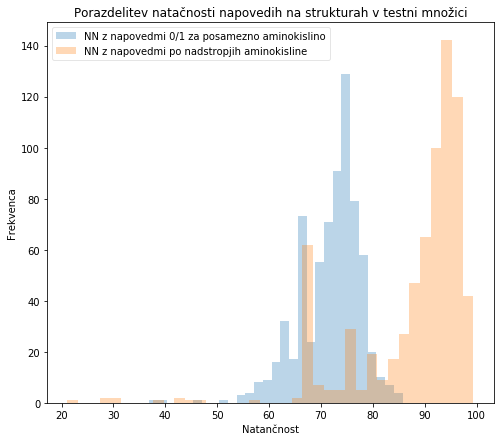

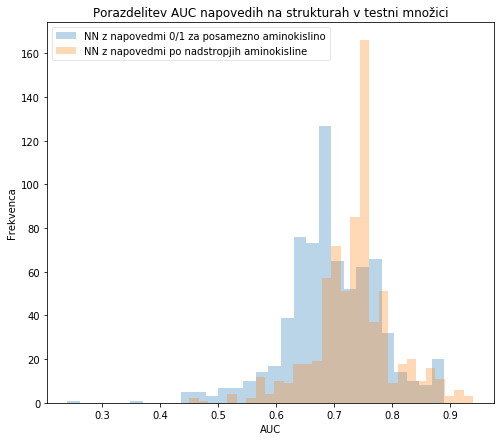

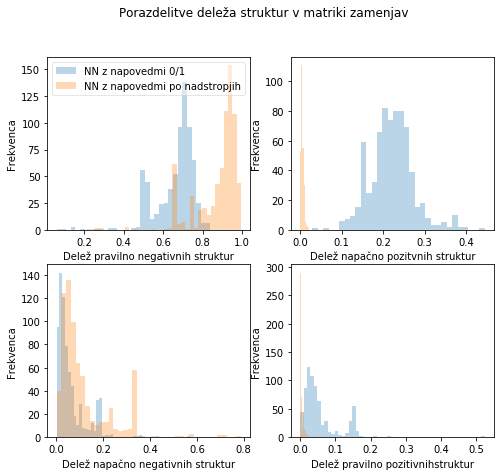

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

results_1 = pd.read_csv('./results/combined_predictions_1_other.csv')
print(results_1.shape)
print(results_1.columns)
print(results_1.loc[0])

results_17 = pd.read_csv('./results/combined_predictions_17_other_2.csv')
print(results_17.shape)
print(results_17.loc[0])

accs = results_1[' accuracy'].values
aucs = results_1[' auc'].values
print('Napovedi 0/1:')
print(f'MIN accuracy: {min(accs)}, MAX accuracy: {max(accs)}, MEAN accuracy: {np.mean(accs)}')
print(f'MIN AUC: {min(aucs)}, MAX AUC: {max(aucs)}, MEAN AUC: {np.mean(aucs)}')

accs_17 = results_17[' accuracy'].values
aucs_17 = results_17[' auc'].values
print('Napovedi po nadstropjih:')
print(f'MIN accuracy: {min(accs_17)}, MAX accuracy: {max(accs_17)}, MEAN accuracy: {np.mean(accs_17)}')
print(f'MIN AUC: {min(aucs_17)}, MAX AUC: {max(aucs)}, MEAN AUC: {np.mean(aucs_17)}')

args = dict(histtype='stepfilled', alpha=0.3, bins='auto')

plt.hist(accs, label = 'NN z napovedmi 0/1 za posamezno aminokislino', **args)
plt.hist(accs_17, label = 'NN z napovedmi po nadstropjih aminokisline', **args)
plt.title('Porazdelitev natačnosti napovedih na strukturah v testni množici')
plt.xlabel('Natančnost')
plt.ylabel('Frekvenca')
plt.legend(loc="upper left", fancybox=True, framealpha=0.5)
plt.savefig('natancnosti_validacijska')
plt.show()

args_auc  = dict(histtype='stepfilled', alpha=0.3, bins=30)
plt.hist(aucs, label = 'NN z napovedmi 0/1 za posamezno aminokislino', **args_auc)
plt.hist(aucs_17, label = 'NN z napovedmi po nadstropjih aminokisline', **args_auc)
plt.title('Porazdelitev AUC napovedih na strukturah v testni množici')
plt.xlabel('AUC')
plt.ylabel('Frekvenca')
plt.legend(loc="upper left", fancybox=True, framealpha=0.5)
plt.savefig('auc_validacijska')
plt.show()

plt.rcParams['figure.figsize'] = [8,7]

fig, axes = plt.subplots(2,2)
fig.suptitle('Porazdelitve deleža struktur v matriki zamenjav')
ax = axes[0,0]
nv = results_1[' num_vox'].values
nv_17 = results_17[' num_vox'].values
ax.hist(results_1[' conf_matrix_00'].values/nv,label = 'NN z napovedmi 0/1', **args)
ax.hist(results_17[' conf_matrix_00'].values/nv_17,label = 'NN z napovedmi po nadstropjih', **args)
ax.set_xlabel('Delež pravilno negativnih struktur')
ax.set_ylabel('Frekvenca')
ax.legend(loc="upper left", fancybox=True, framealpha=0.5)
ax = axes[0,1]
ax.hist(results_1[' conf_matrix_01'].values/nv, **args)
ax.hist(results_17[' conf_matrix_01'].values/nv_17, **args)
ax.set_xlabel('Delež napačno pozitvnih struktur')
ax.set_ylabel('Frekvenca')
ax = axes[1,0]
ax.hist(results_1[' conf_matrix_10'].values/nv, **args)
ax.hist(results_17[' conf_matrix_10'].values/nv_17, **args)
ax.set_xlabel('Delež napačno negativnih struktur')
ax.set_ylabel('Frekvenca')
ax = axes[1,1]
ax.hist(results_1[' conf_matrix_11'].values/nv, **args)
ax.hist(results_17[' conf_matrix_11'].values/nv_17, **args)
ax.set_xlabel('Delež pravilno pozitivnihstruktur')
ax.set_ylabel('Frekvenca')
plt.savefig('matrika_zamenjav_validacijska')
plt.show()